In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pickle
import warnings
warnings.filterwarnings('ignore')
import cv2


In [2]:
df= pd.read_csv('F://numbers.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
X= df.iloc[:,1:].values   # convert into arrays(values)................ all rows 
Y= df.iloc[:,0].values ##......................................0th col

In [6]:
X.shape

(42000, 784)

In [7]:
Y.shape

(42000,)

**APPLY TO ALL 784 COLUMNS**

In [8]:
#xnorma = X/255.0   ------------> this is ti transform the data

In [9]:
mmx= MinMaxScaler()
sc= StandardScaler()

In [10]:
x_mmx=mmx.fit_transform(X)  # this is part of pre processing and it is normalisation,,,,,,,, # 0-1 range
x_sc=sc.fit_transform(X)# z-score

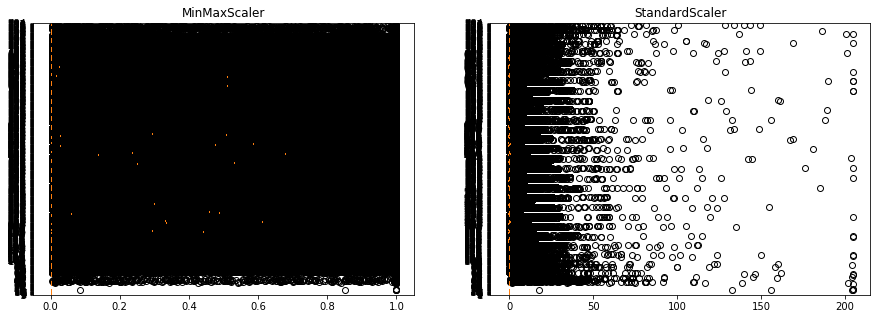

In [11]:
#visulaising the data:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(x_mmx, vert=False)
plt.title('MinMaxScaler')

plt.subplot(1,2,2)
plt.boxplot(x_sc,vert=False)
plt.title('StandardScaler')

plt.show()

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca=PCA()

In [14]:
xpca= pca.fit_transform(x_mmx)   # applying to standard Scaler array

In [15]:
xpca.shape, x_mmx.shape
#xpca---> consists of X1,X2,...,X13(eigen vector) Each components as diff var(we have to understand that var)

((42000, 784), (42000, 784))

In [16]:
pca.explained_variance_  # this our eigen values of pca

array([5.14849052e+00, 3.78139291e+00, 3.24569996e+00, 2.84085203e+00,
       2.58469834e+00, 2.27256118e+00, 1.73063630e+00, 1.52734267e+00,
       1.46122297e+00, 1.24045731e+00, 1.10867030e+00, 1.08737480e+00,
       8.99132001e-01, 8.93974270e-01, 8.35005359e-01, 7.83310780e-01,
       6.96937612e-01, 6.77418708e-01, 6.27379617e-01, 6.08778993e-01,
       5.66232725e-01, 5.36134972e-01, 5.09572663e-01, 4.82081310e-01,
       4.68770225e-01, 4.42959183e-01, 4.28747593e-01, 4.10554180e-01,
       3.91135379e-01, 3.62631526e-01, 3.47485752e-01, 3.37354747e-01,
       3.16530597e-01, 3.11009968e-01, 2.98029951e-01, 2.85689139e-01,
       2.68924179e-01, 2.57455301e-01, 2.51152168e-01, 2.46386036e-01,
       2.39207919e-01, 2.35002431e-01, 2.20884037e-01, 2.09926040e-01,
       2.03079777e-01, 1.97998003e-01, 1.90654018e-01, 1.84057400e-01,
       1.77702050e-01, 1.69384523e-01, 1.66600806e-01, 1.63262333e-01,
       1.55110230e-01, 1.51324924e-01, 1.48271487e-01, 1.42387712e-01,
      

In [17]:
evr=pca.explained_variance_ratio_  # this represents the % of var.
evr

array([9.74849587e-02, 7.15994194e-02, 6.14562512e-02, 5.37905900e-02,
       4.89404049e-02, 4.30301914e-02, 3.27690238e-02, 2.89197264e-02,
       2.76677718e-02, 2.34876474e-02, 2.09923040e-02, 2.05890808e-02,
       1.70247659e-02, 1.69271060e-02, 1.58105493e-02, 1.48317296e-02,
       1.31962823e-02, 1.28266983e-02, 1.18792248e-02, 1.15270281e-02,
       1.07214287e-02, 1.01515377e-02, 9.64858920e-03, 9.12804956e-03,
       8.87600858e-03, 8.38728506e-03, 8.11819333e-03, 7.77370709e-03,
       7.40601855e-03, 6.86630755e-03, 6.57952735e-03, 6.38770013e-03,
       5.99340176e-03, 5.88887049e-03, 5.64309817e-03, 5.40942900e-03,
       5.09199005e-03, 4.87483066e-03, 4.75548291e-03, 4.66523779e-03,
       4.52932253e-03, 4.44969301e-03, 4.18236591e-03, 3.97487987e-03,
       3.84524817e-03, 3.74902645e-03, 3.60997053e-03, 3.48506575e-03,
       3.36472931e-03, 3.20723970e-03, 3.15453096e-03, 3.09131806e-03,
       2.93696071e-03, 2.86528720e-03, 2.80747137e-03, 2.69606405e-03,
      

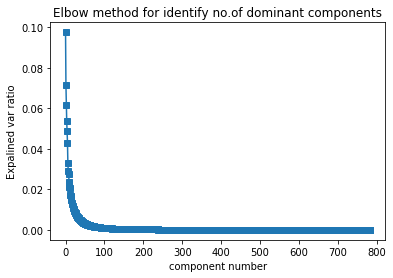

In [18]:
plt.plot(evr,'s-')
plt.xlabel('component number')
plt.ylabel('Expalined var ratio')
plt.title('Elbow method for identify no.of dominant components')
plt.show()

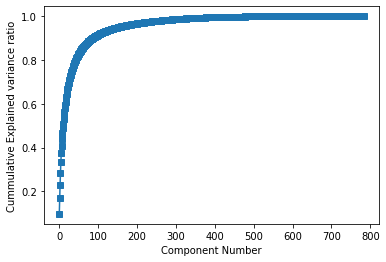

In [19]:
# applying Cummilative variance or sum:

cuv= np.cumsum(evr)
plt.plot(cuv,'s-')
plt.xlabel('Component Number')
plt.ylabel('Cummulative Explained variance ratio')
plt.show()

In [20]:
#by components
pca1= PCA(n_components=4)
xpca1= pca1.fit_transform(x_mmx)
xpca1.shape

(42000, 4)

In [21]:
# by EVR:
pca2=PCA(0.85)  #---> this is %, depends on how much we need.
xpca2= pca2.fit_transform(x_mmx)
xpca2.shape

(42000, 59)

In [22]:
pca2.n_components_

59

## Understanding the PCA for Images:

Lenght of array 784


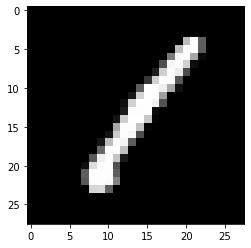

In [23]:
# lets consider one image or one row:

row= X[0]    #----> this is row image
len(row)
print('Lenght of array', len(row))
# step-1 : reshape into 28 X 28 array
img= row.reshape((28,28))
# step-2: Visualise it
plt.imshow(img,cmap='gray')
plt.show()
##---------------> black-> 0 white--> 255  grey---> [0-255]



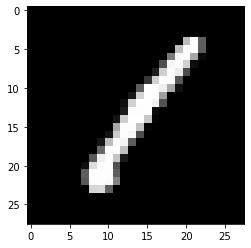

In [24]:
# Normalization

img_norm = img/255.0   #255 is max vaue for 8 bit image
plt.imshow(img_norm,cmap='gray')
plt.show()

***Generate 784 random numbers in range of [0-1] and add to img_norm and visualize your data***

In [25]:
rand= np.random.random((28,28))
len(rand)
rand

img_noise= img_norm + rand*0.2   #20% noise

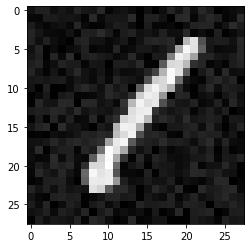

In [26]:
plt.imshow(img_noise,cmap='gray')
plt.show()

In [27]:
img_pca= pca.fit_transform(img_noise)

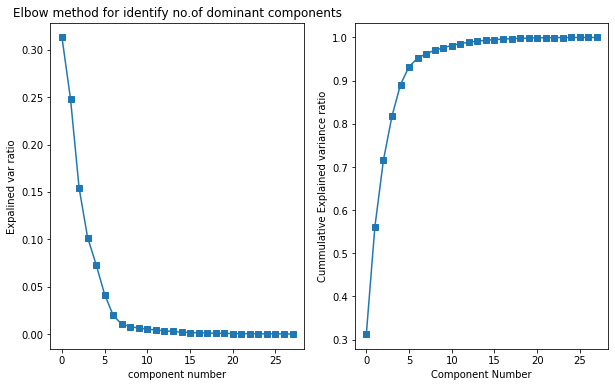

In [28]:
evr1= pca.explained_variance_ratio_
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(evr1,'s-')
plt.xlabel('component number')
plt.ylabel('Expalined var ratio')
plt.title('Elbow method for identify no.of dominant components')
#plt.show()
# applying Cummilative variance or sum:
plt.subplot(1,2,2)
cuv= np.cumsum(evr1)
plt.plot(cuv,'s-')
plt.xlabel('Component Number')
plt.ylabel('Cummulative Explained variance ratio')
plt.show()

**From above visualization, considering 7 components**

In [29]:
pca2= PCA(0.92)   #or we can write n_components=(elbow method)
img_pca1 = pca2.fit_transform(img_noise)

In [30]:
img_filter= pca2.inverse_transform(img_pca1)

In [31]:
img_0= np.maximum(img_filter,0)

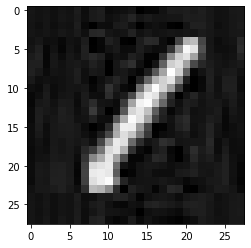

In [32]:
plt.imshow(img_0,cmap='gray')

In [33]:
#from above fig the noise has been reduced.

**APPLY TO ALL 784 COLUMNS**    - following code is above

In [34]:
X.shape

(42000, 784)

In [35]:
# now save pca2 in pickle

In [36]:
from sklearn.externals import joblib

#or

#pickle.dumb(pca2,open('./pca_number.pickle','wb'))

In [37]:
joblib.dump(pca2,'pca2 image.pickle')

['pca2 image.pickle']

In [38]:
#loading the pickle file
img = joblib.load('pca2 image.pickle')

In [39]:
img

PCA(copy=True, iterated_power='auto', n_components=0.92, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
# now split the X into training and testing

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test= train_test_split(xpca2,Y,test_size=0.2)

In [43]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((33600, 59), (8400, 59), (33600,), (8400,))

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model= LogisticRegression()

In [46]:
model.fit(x_train,y_train)
print('Model Trained Successfully')

Model Trained Successfully


# check statistical evaluation:
# do confusion matrix
# kappa score should be more than 60% we have to consider our model, if not search for another model
# roc
# AOC

In [47]:
#we have to take mle------->
# this is default ---> but dont consider this
y_pred = model.predict(x_test)  #threshold=0.5-----> coz the data is balanced data

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
cm= confusion_matrix(y_test,y_pred)
#plt.figure(figsize=(10,5))

#sns.heatmap(cm,annot=True,fmt='0.2f',xticklabels=['class-0','class-1'],yticklabels=['class-0','class-1'], cbar=False)
#plt.xlabel('Predicted Values')
#plt.ylabel('True Values')
#plt.show()

In [52]:
print(cm)

[[874   0   2   4   1   2   9   1   5   1]
 [  0 869   3   2   0   6   0   2  10   0]
 [  5  12 755  15  19   6  12  17  24   5]
 [  2  10  18 752   2  30   3  12  16  13]
 [  1   4   8   1 728   5   5   3   6  36]
 [ 12   7   4  33  13 655  21   4  26  11]
 [  3   2   5   0   7  11 756   1   4   0]
 [  1  14  10   2  11   1   3 794   1  29]
 [  9  12   7  19   5  38   4   5 718  15]
 [ 11   4   2  17  34  10   0  30  10 693]]


In [53]:
cr= classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       899
           1       0.93      0.97      0.95       892
           2       0.93      0.87      0.90       870
           3       0.89      0.88      0.88       858
           4       0.89      0.91      0.90       797
           5       0.86      0.83      0.85       786
           6       0.93      0.96      0.94       789
           7       0.91      0.92      0.92       866
           8       0.88      0.86      0.87       832
           9       0.86      0.85      0.86       811

    accuracy                           0.90      8400
   macro avg       0.90      0.90      0.90      8400
weighted avg       0.90      0.90      0.90      8400



In [54]:
from sklearn import metrics

In [55]:
#kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.8933574802677315

In [56]:
#ROC: AOC
#probabilities

y_pred_prob= model.predict_proba(x_test)
y_pred_prob


array([[1.58301184e-03, 8.08698764e-10, 7.51562063e-02, ...,
        7.04749628e-03, 2.83758669e-03, 7.84090030e-07],
       [2.00752619e-04, 1.75793600e-04, 2.30646427e-02, ...,
        1.23081107e-06, 6.33326334e-01, 9.77181710e-03],
       [1.66692104e-04, 6.93035509e-06, 3.64012380e-02, ...,
        9.48551923e-02, 7.73112544e-04, 1.65058111e-02],
       ...,
       [7.24621696e-07, 8.16385484e-05, 5.36235582e-04, ...,
        9.33511507e-01, 2.05323250e-02, 4.35476196e-02],
       [1.17927709e-05, 2.96753677e-06, 2.43835667e-03, ...,
        2.58047855e-02, 2.14933559e-02, 7.32357414e-01],
       [7.19780012e-01, 2.73118673e-06, 5.02948324e-03, ...,
        5.63181911e-03, 9.07622545e-02, 5.17887164e-04]])

In [57]:
y_pred_prob[0]

array([1.58301184e-03, 8.08698764e-10, 7.51562063e-02, 4.97901741e-05,
       1.17505984e-01, 2.30427233e-07, 7.95818909e-01, 7.04749628e-03,
       2.83758669e-03, 7.84090030e-07])

<BarContainer object of 10 artists>

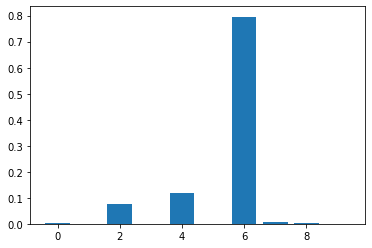

In [58]:
plt.bar(np.arange(0,10),y_pred_prob[0])

In [59]:
#ROC: true +ve rate AOC

In [60]:
from pandas_ml import ConfusionMatrix

In [61]:
cm_p= ConfusionMatrix(y_test,y_pred)
cm_p

Predicted    0    1    2    3    4    5    6    7    8    9  __all__
Actual                                                              
0          874    0    2    4    1    2    9    1    5    1      899
1            0  869    3    2    0    6    0    2   10    0      892
2            5   12  755   15   19    6   12   17   24    5      870
3            2   10   18  752    2   30    3   12   16   13      858
4            1    4    8    1  728    5    5    3    6   36      797
5           12    7    4   33   13  655   21    4   26   11      786
6            3    2    5    0    7   11  756    1    4    0      789
7            1   14   10    2   11    1    3  794    1   29      866
8            9   12    7   19    5   38    4    5  718   15      832
9           11    4    2   17   34   10    0   30   10  693      811
__all__    918  934  814  845  820  764  813  869  820  803     8400

In [62]:
cm_p.classification_report

,precision,recall,F1_score,support
Classes,,,,
0,0.95207,0.972191,0.962025,899
1,0.930407,0.974215,0.951807,892
2,0.927518,0.867816,0.896675,870
3,0.889941,0.876457,0.883147,858
4,0.887805,0.913425,0.900433,797
5,0.85733,0.833333,0.845161,786
6,0.929889,0.958175,0.94382,789
7,0.913694,0.916859,0.915274,866
8,0.87561,0.862981,0.869249,832


In [63]:
cm_p.stats_overall

OrderedDict([('Accuracy', 0.9040476190476191),
             ('95% CI', (0.8975487508716464, 0.9102646240841196)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.0),
             ('Kappa', 0.8933574802677317),
             ("Mcnemar's Test P-Value", 'ToDo')])

In [64]:
#ROC: true +ve rate AOC

In [65]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder()

In [66]:
y_test_ohe= ohe.fit_transform(y_test.reshape(-1,1)).toarray()
y_test_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
#roc for 0:
fpr,tpr,proba=  metrics.roc_curve(y_test_ohe[:,0],y_pred_prob[:,0])

In [74]:
for i in range(10):
    plt.figure(figsize=(10,5)
    fpr,tpr,proba = metrics.roc_curve(y_test_ohe[:,i],y_pred_prob[:,i])
    area= metrics.auc(fpr,tpr)
    plt.legend(["AUC =%0.4f"%area])
    plt.plot(fpr,tpr)
    plt.title('ROC FOR CLASS {}'.format(i))
    for i in range(len(fpr)):
        if i %20==1:
            plt.text(fpr[i],tpr[i],'%0.2f'%proba[i])
    plt.plot([0,1],[0,1],'b-')
    plt.show()

SyntaxError: invalid syntax (<ipython-input-74-55542b164e34>, line 3)

In [71]:
for i in range(10):
    plt.figure(figsize=(10,5)
    fpr,tpr, proba = metrics.roc_curve(y_test_ohe[:,i],y_pred_prob[:,i])
    area= metrics.auc(fpr,tpr)
    plt.legend(["AUC =%0.4f"%area])
    plt.plot(fpr,tpr)
    plt.title('ROC FOR CLASS {}'.format(i))
    for i in range(len(fpr)):
        if i %20==1:
            plt.text(fpr[i],tpr[i],'%0.2f'%proba[i])
    plt.plot([0,1],[0,1],'b-')
    plt.show()

SyntaxError: invalid syntax (<ipython-input-71-ae02203dcc7e>, line 3)

In [ ]:
#save model

In [72]:
#pickle.dump(model,open('model_number_class.pickle','wb'))

In [73]:
#real time testing:

## how to pass the google imge or taken image:   and only with saved pca and model
- Convert to gray scale
- Not operation(binary image)
- Resize
- Flattening
- Normalise

# take a new file and write the code as below:


import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt
% matplotlib inline




model= pickle.load(open('model_number_class.pickle','rb')



pca= pickle.load(open(pca2_num......','rb')





-------------------------------------------------------------
load data
---------------------------------------------------------------
img= cv2.imread('file path.jpg')
plt.imshow(img)
plt.show()

------------------------------

step 1----> convert into gray scale

-------------------------------------------------------

gray= cv2.cvtcolor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()

--------------------------------------------------

step 2------------> bitwise not:

----------------------------------------------------
inverse= cv2.bitwise_not(gray)   ------->
(the img should be more dark so we will take threshold)
plt.imshow(inverse,cmap='gray')
plt.show()

---------------------------------------------------------------------------

step 3---> threshold

--------------------------------------------------------------------------

ret,binary = cv2.threshold(inverse,152,255,cv2.THRESH_BINARY)
plt.imshow(binary,cmap='gray')
plt.show()



### resize image(20X20) array:

binary_re= cv2.resize(binary,(28,28))   # default technique is ----> interArea



###### Flattening:

flat= binary_re.flatten()
plt.imshow(binary_re,cmap='gray')





test=  flat/255.0



test_pca= pca.transform(test.reshape(1,-1))  ---------------> apply to pca
test_pca.shape





##### pass to model


model.predict(test_pca)



model.predict_proba(test_pca)
